In [1]:
import sys
sys.path.append('..')

from utils.common import read_beacon_coords, read_beacon_data, process_beacon_data, process_beacon_data_for_pos
import argparse
import pandas as pd

args = argparse.Namespace(beacon_coords_file='../data0820p/beacon_coords.txt', beacon_data_file='../data0820p/bluetoothData_1.3m.txt', update_frequency=10)

actual_coords = read_beacon_coords(args.beacon_coords_file)
beacon_data = read_beacon_data(args.beacon_data_file)
print("beacon_data", beacon_data)
print(type(beacon_data))


# actual_coords_df = pd.DataFrame(actual_coords)

# # Convert beacon_data to a DataFrame
# beacon_data_df = pd.DataFrame(beacon_data)

# print("Actual Coordinates DataFrame:")
# print(actual_coords_df)
# print(actual_coords_df.dtypes)

# print("\nBeacon Data DataFrame:")
# print(beacon_data_df)
# print(beacon_data_df.dtypes)


beacon_data [[{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -46, 'accuracy': 0.6533801602200308, 'time': 1724139774873}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -48, 'accuracy': 1.47085, 'time': 1724139775382}, {'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -69, 'accuracy': 34.59438414037775, 'time': 1724139775382}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -48, 'accuracy': 1.47085, 'time': 1724139775906}, {'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -70, 'accuracy': 39.833273094050156, 'time': 1724139775906}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -48, 'accuracy': 1.47085, 'time': 1724139776547}, {'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -70, 'accuracy': 39.833273094050156, 'time': 1724139776547}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -49, 'accuracy': 1.6805117536150982, 'time': 1724139777265}, {'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -72, 'accur

Interval between data 0 and 1: 0.51 seconds
Interval between data 1 and 2: 0.52 seconds
Interval between data 2 and 3: 0.64 seconds
Interval between data 3 and 4: 0.72 seconds
Interval between data 4 and 5: 0.54 seconds
Interval between data 5 and 6: 0.64 seconds
Interval between data 6 and 7: 0.52 seconds
Interval between data 7 and 8: 0.74 seconds
Interval between data 8 and 9: 0.72 seconds
Interval between data 9 and 10: 0.55 seconds
Interval between data 10 and 11: 0.62 seconds
Interval between data 11 and 12: 0.52 seconds
Interval between data 12 and 13: 0.61 seconds
Interval between data 13 and 14: 0.76 seconds
Interval between data 14 and 15: 0.64 seconds
Interval between data 15 and 16: 0.83 seconds
Interval between data 16 and 17: 0.84 seconds
Interval between data 17 and 18: 0.53 seconds
Interval between data 18 and 19: 0.61 seconds
Interval between data 19 and 20: 0.65 seconds
Interval between data 20 and 21: 0.64 seconds
Interval between data 21 and 22: 0.83 seconds
Interva

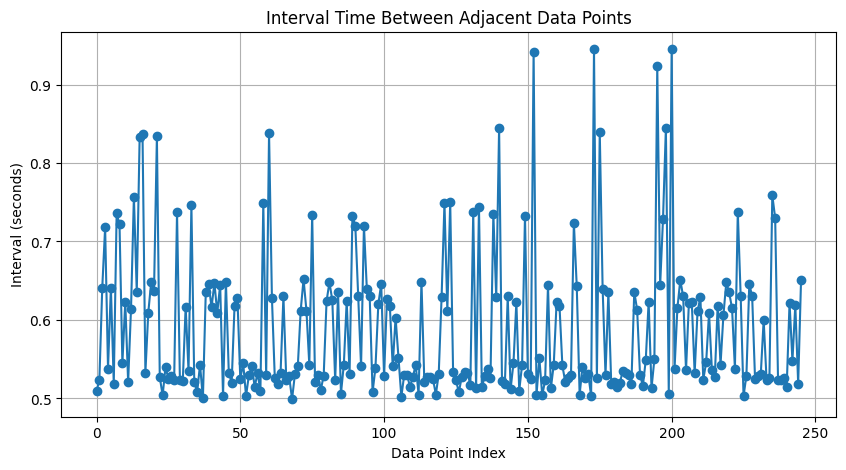

Average interval: 0.59 seconds
Minimum interval: 0.50 seconds
Maximum interval: 0.94 seconds


In [2]:
import matplotlib.pyplot as plt

intervals = []
for i in range(len(beacon_data) - 1):
    current_time = beacon_data[i][0]['time']
    next_time = beacon_data[i+1][0]['time']
    interval = (next_time - current_time) / 1000  # Convert milliseconds to seconds
    intervals.append(interval)
    print(f"Interval between data {i} and {i+1}: {interval:.2f} seconds")

plt.figure(figsize=(10, 5))
plt.plot(range(len(intervals)), intervals, marker='o')
plt.title('Interval Time Between Adjacent Data Points')
plt.xlabel('Data Point Index')
plt.ylabel('Interval (seconds)')
plt.grid(True)
plt.show()

print(f"Average interval: {sum(intervals) / len(intervals):.2f} seconds")
print(f"Minimum interval: {min(intervals):.2f} seconds")
print(f"Maximum interval: {max(intervals):.2f} seconds")

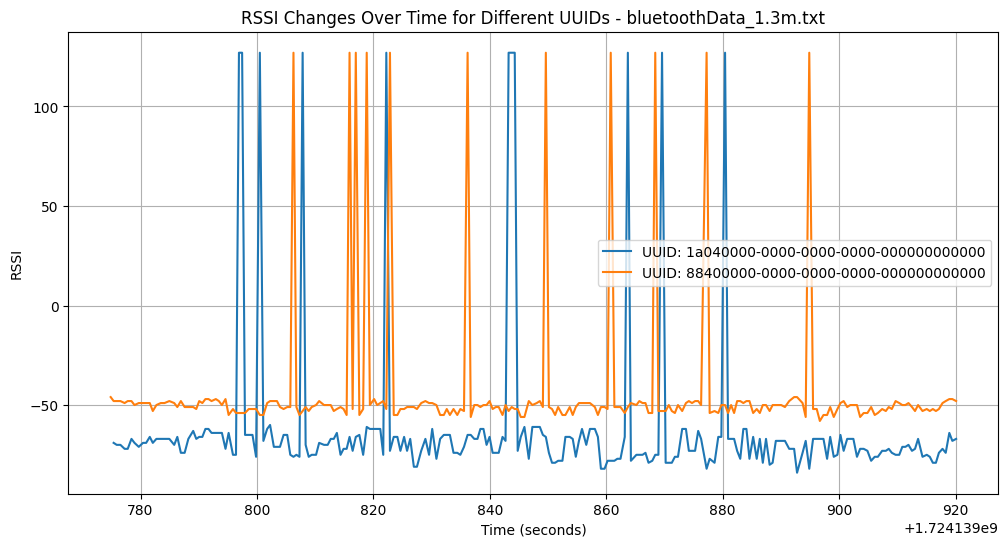

File: bluetoothData_1.3m.txt
UUID: 1a040000-0000-0000-0000-000000000000
  Number of data points: 246
  Min RSSI: -84
  Max RSSI: 127
  Average RSSI: -61.67

UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 247
  Min RSSI: -58
  Max RSSI: 127
  Average RSSI: -43.10





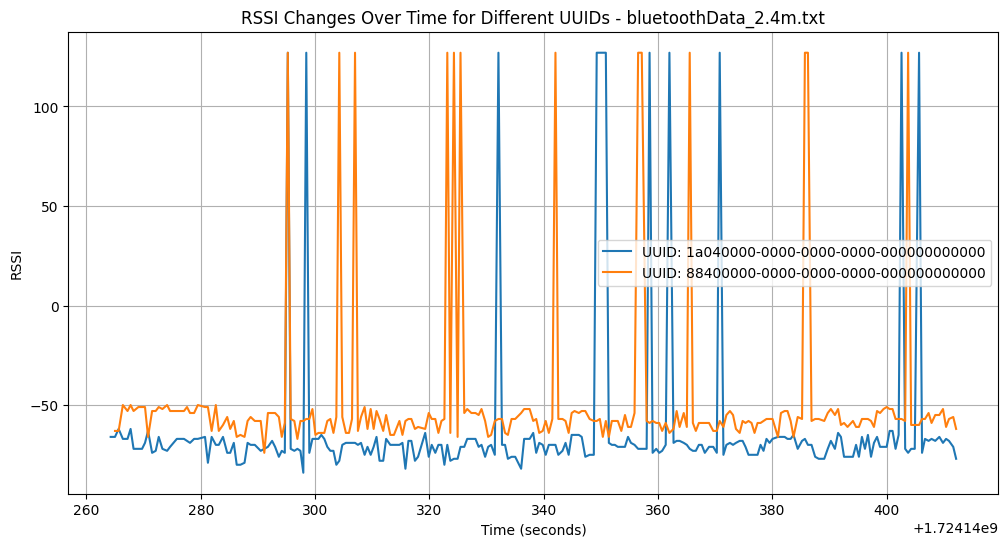

File: bluetoothData_2.4m.txt
UUID: 1a040000-0000-0000-0000-000000000000
  Number of data points: 247
  Min RSSI: -84
  Max RSSI: 127
  Average RSSI: -61.23

UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 246
  Min RSSI: -74
  Max RSSI: 127
  Average RSSI: -48.17





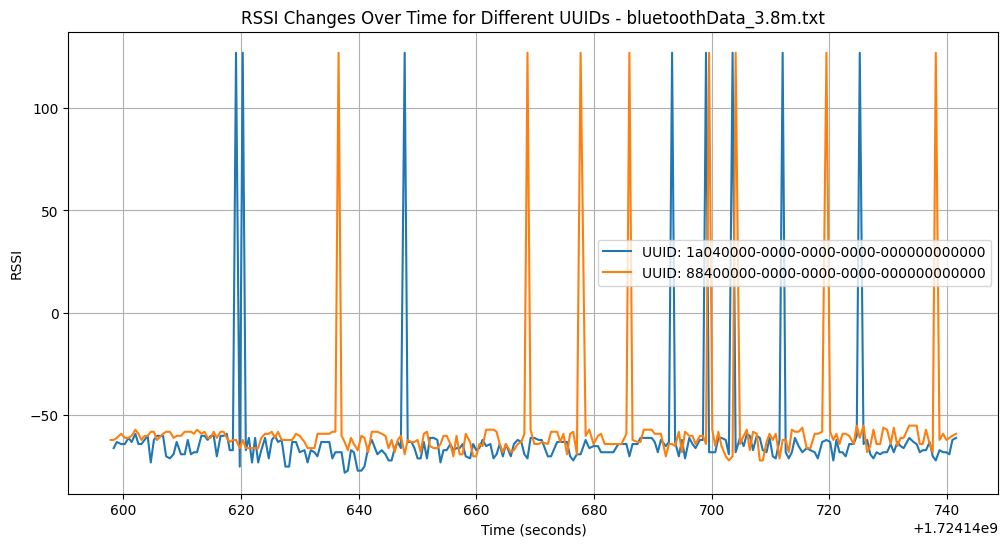

File: bluetoothData_3.8m.txt
UUID: 1a040000-0000-0000-0000-000000000000
  Number of data points: 244
  Min RSSI: -78
  Max RSSI: 127
  Average RSSI: -59.55

UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 245
  Min RSSI: -72
  Max RSSI: 127
  Average RSSI: -55.55





In [3]:
# Print RSSI values between adjacent lists in beacon_data
import matplotlib.pyplot as plt

import os
import glob

# Get all bluetooth data files
data_files = sorted(glob.glob('../data0820p/bluetoothData*.txt'))

for file_path in data_files:
    # Read beacon data from the current file
    beacon_data = read_beacon_data(file_path)
    
    # Create a dictionary to store RSSI values for each UUID
    uuid_rssi_data = {}

    # Collect RSSI data for each UUID
    for data_list in beacon_data:
        for beacon in data_list:
            uuid = beacon['uuid']
            rssi = beacon['rssi']
            time = beacon['time'] / 1000  # Convert milliseconds to seconds
            
            if uuid not in uuid_rssi_data:
                uuid_rssi_data[uuid] = {'time': [], 'rssi': []}
            
            uuid_rssi_data[uuid]['time'].append(time)
            uuid_rssi_data[uuid]['rssi'].append(rssi)

    # Plot RSSI changes for each UUID
    plt.figure(figsize=(12, 6))

    # Sort UUIDs to ensure consistent order
    sorted_uuids = sorted(uuid_rssi_data.keys())

    for uuid in sorted_uuids:
        data = uuid_rssi_data[uuid]
        plt.plot(data['time'], data['rssi'], label=f'UUID: {uuid}')

    plt.title(f'RSSI Changes Over Time for Different UUIDs - {os.path.basename(file_path)}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('RSSI')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print summary statistics
    print(f"File: {os.path.basename(file_path)}")
    for uuid in sorted_uuids:
        data = uuid_rssi_data[uuid]
        print(f"UUID: {uuid}")
        print(f"  Number of data points: {len(data['rssi'])}")
        print(f"  Min RSSI: {min(data['rssi'])}")
        print(f"  Max RSSI: {max(data['rssi'])}")
        print(f"  Average RSSI: {sum(data['rssi']) / len(data['rssi']):.2f}")
        print()
    print("\n" + "="*50 + "\n")


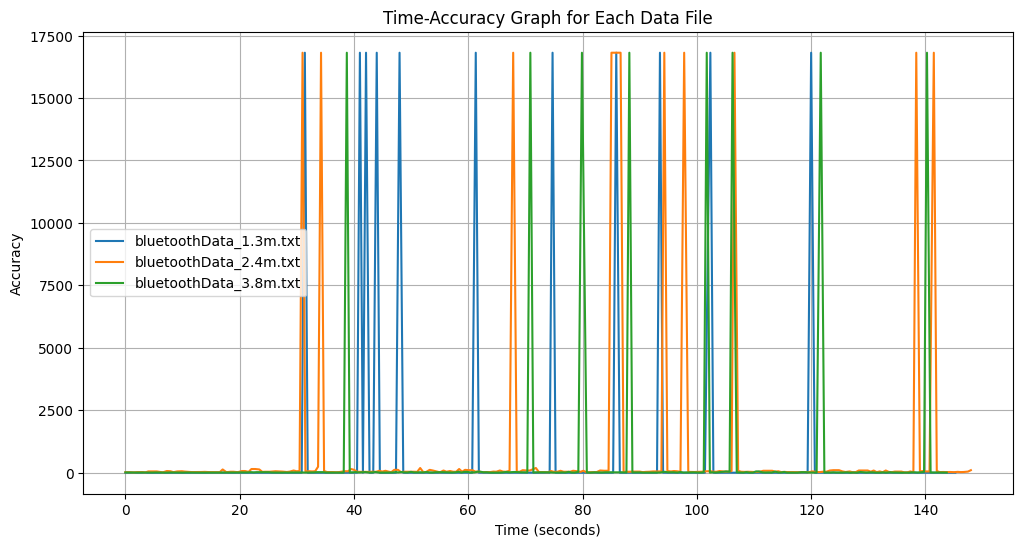

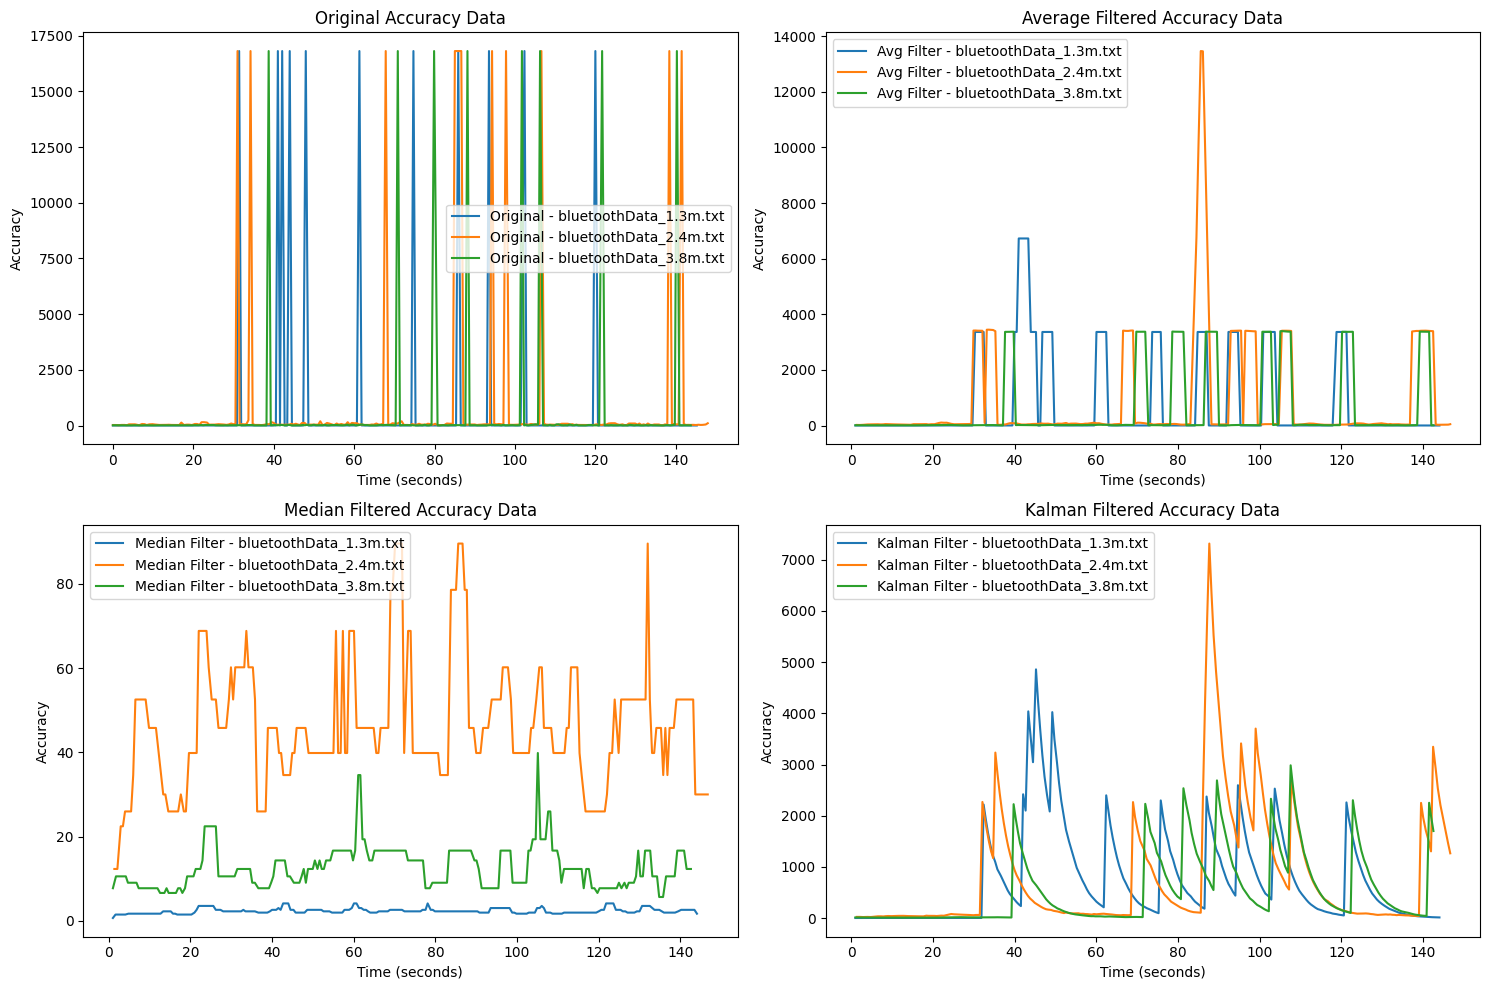

{1.3: 2.2331225154794794, 2.4: 45.78640352029778, 3.8: 12.296376053275772}


In [4]:
# Read data files and plot time-accuracy graph for each file
plt.figure(figsize=(12, 6))

for file_path in data_files:
    beacon_data = read_beacon_data(file_path)
    
    # Extract timestamps and calculate time differences
    timestamps = []
    accuracies = []
    for data in beacon_data:
        if data:  # Check if the data list is not empty
            timestamps.append(data[0]['time'])
            accuracies.append(data[0]['accuracy'])
    
    time_diffs = [(t - timestamps[0]) / 1000 for t in timestamps]  # Convert to seconds
    
    # Plot time-accuracy graph for this file
    plt.plot(time_diffs, accuracies, label=os.path.basename(file_path))

plt.title('Time-Accuracy Graph for Each Data File')
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


import numpy as np
from scipy.signal import medfilt
from filterpy.kalman import KalmanFilter
import re

def apply_average_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def apply_median_filter(data, window_size=9):
    return medfilt(data, kernel_size=window_size)

def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.x = np.array([data[0]])
    kf.P *= 1000.
    kf.R = 5
    kf.Q = 0.1
    kf.H = np.array([[1.]])
    kf.F = np.array([[1.]])
    
    filtered_data = []
    for measurement in data:
        kf.predict()
        kf.update(measurement)
        filtered_data.append(kf.x[0])
    return filtered_data

# Apply filters to accuracy data and plot graphs
plt.figure(figsize=(15, 10))

# Initialize the distance-accuracy dictionary
distance_accuracy_dict = {}

for file_path in data_files:
    beacon_data = read_beacon_data(file_path)
    
    # Extract timestamps and calculate time differences
    timestamps = []
    accuracies = []
    for data in beacon_data:
        if data:  # Check if the data list is not empty
            timestamps.append(data[0]['time'])
            accuracies.append(data[0]['accuracy'])
    
    time_diffs = [(t - timestamps[0]) / 1000 for t in timestamps]  # Convert to seconds
    
    # Apply filters
    avg_filtered = apply_average_filter(accuracies)
    median_filtered = apply_median_filter(accuracies)
    kalman_filtered = apply_kalman_filter(accuracies)
    
    # Adjust time_diffs for filtered data (due to window size in average and median filters)
    filtered_time_diffs = time_diffs[2:-2]  # Assuming window_size=5 for both filters
    
    # Ensure all arrays have the same length
    min_length = min(len(filtered_time_diffs), len(avg_filtered), len(median_filtered), len(kalman_filtered))
    filtered_time_diffs = filtered_time_diffs[:min_length]
    avg_filtered = avg_filtered[:min_length]
    median_filtered = median_filtered[:min_length]
    kalman_filtered = kalman_filtered[:min_length]
    
    # Calculate and store average median accuracy
    median_accuracy = np.median(median_filtered)
    
    match = re.search(r'(\d+(?:\.\d+)?)m', os.path.basename(file_path))
    if match:
        distance = float(match.group(1))
        distance_accuracy_dict[distance] = median_accuracy
    else:
        print(f"Warning: Could not extract distance from filename: {file_path}")

    
    distance_accuracy_dict[distance] = median_accuracy
    
    # Adjust time_diffs for filtered data (due to window size in average and median filters)
    filtered_time_diffs = time_diffs[2:-2]  # Assuming window_size=5 for both filters
    # Plot original and filtered data
    plt.subplot(2, 2, 1)
    plt.plot(time_diffs, accuracies, label=f'Original - {os.path.basename(file_path)}')
    plt.title('Original Accuracy Data')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(filtered_time_diffs, avg_filtered, label=f'Avg Filter - {os.path.basename(file_path)}')
    plt.title('Average Filtered Accuracy Data')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(filtered_time_diffs, median_filtered, label=f'Median Filter - {os.path.basename(file_path)}')
    plt.title('Median Filtered Accuracy Data')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(filtered_time_diffs, kalman_filtered, label=f'Kalman Filter - {os.path.basename(file_path)}')
    plt.title('Kalman Filtered Accuracy Data')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

print(distance_accuracy_dict)


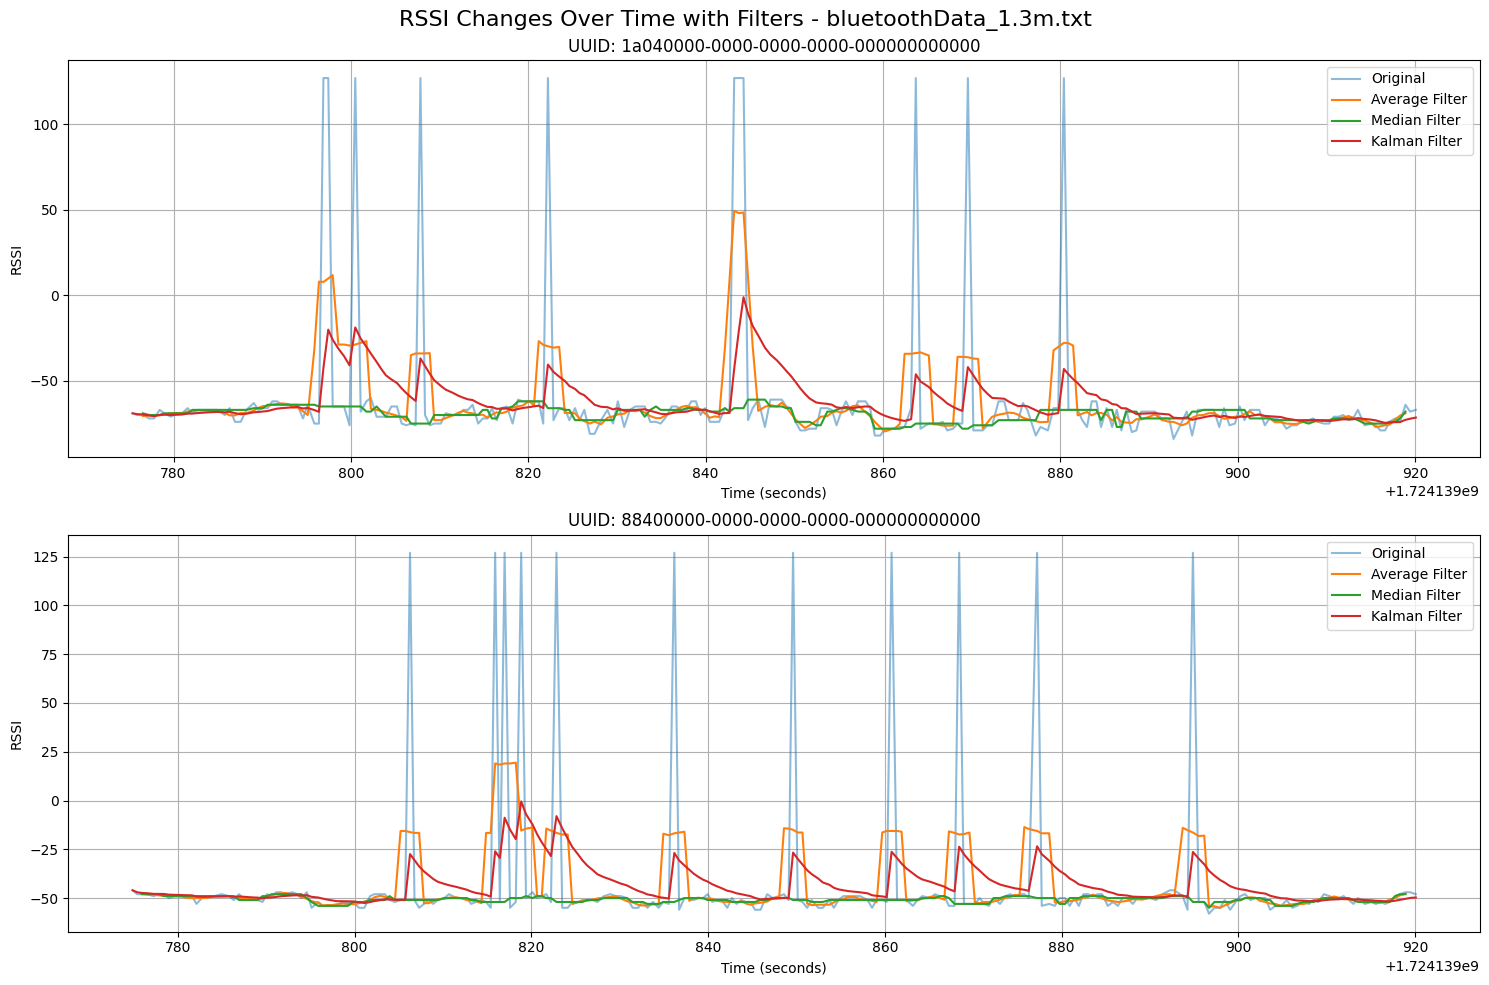

File: bluetoothData_1.3m.txt
UUID: 1a040000-0000-0000-0000-000000000000
  Original mean RSSI: -61.67
  Average filter mean RSSI: -61.56
  Median filter mean RSSI: -69.56
  Kalman filter mean RSSI: -61.62

UUID: 88400000-0000-0000-0000-000000000000
  Original mean RSSI: -43.10
  Average filter mean RSSI: -43.03
  Median filter mean RSSI: -50.69
  Kalman filter mean RSSI: -43.04





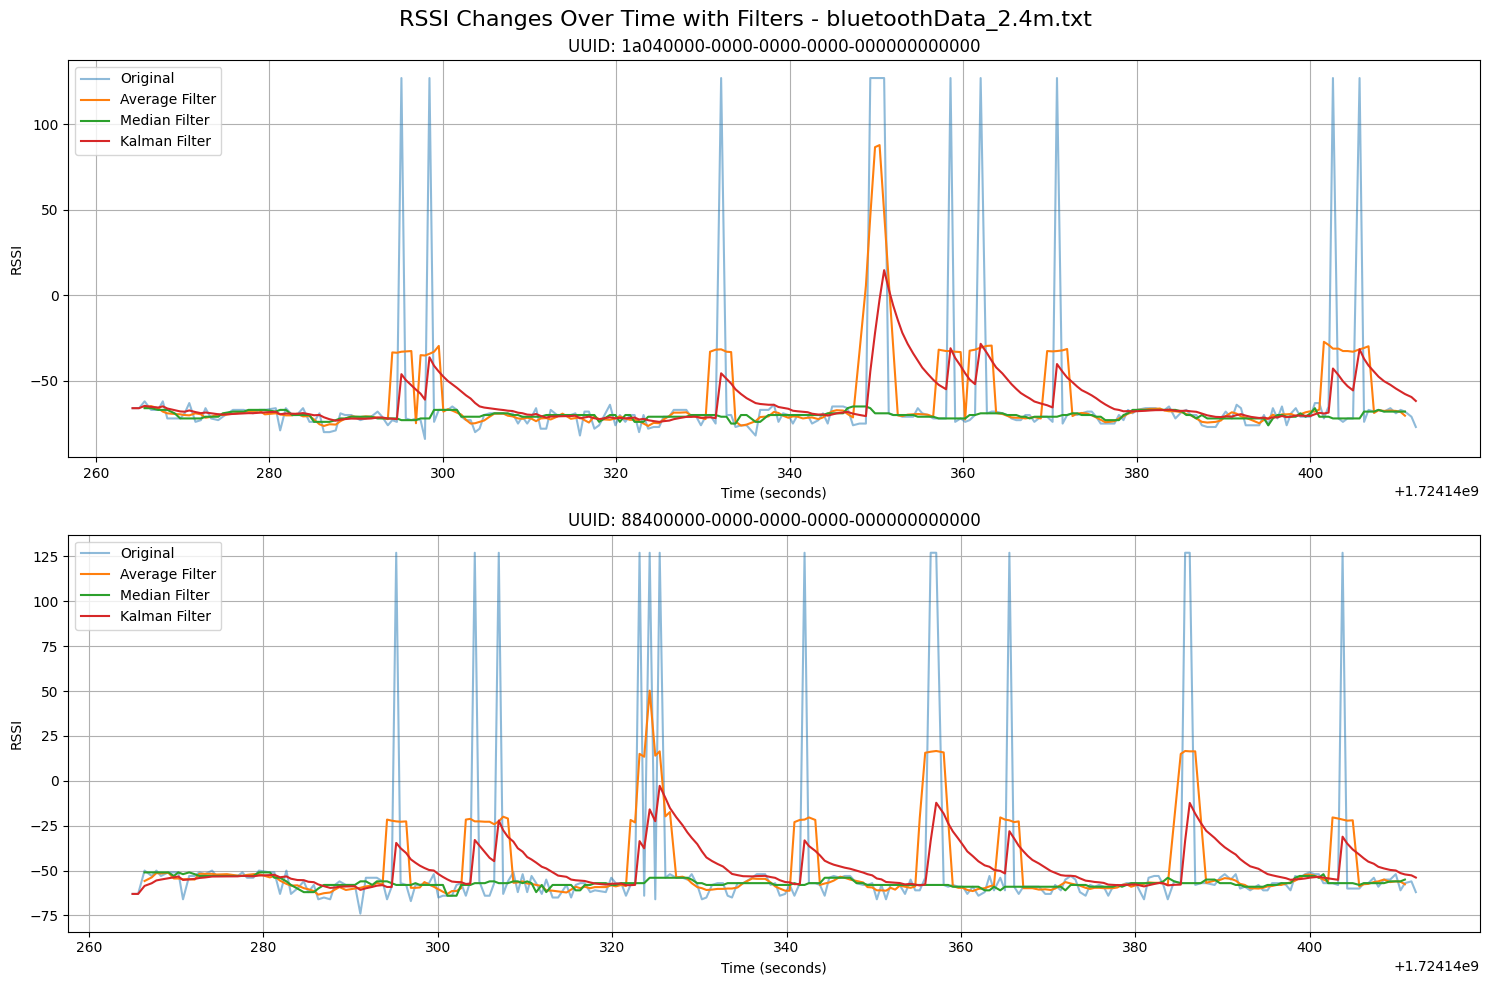

File: bluetoothData_2.4m.txt
UUID: 1a040000-0000-0000-0000-000000000000
  Original mean RSSI: -61.23
  Average filter mean RSSI: -61.11
  Median filter mean RSSI: -70.15
  Kalman filter mean RSSI: -61.35

UUID: 88400000-0000-0000-0000-000000000000
  Original mean RSSI: -48.17
  Average filter mean RSSI: -47.98
  Median filter mean RSSI: -56.91
  Kalman filter mean RSSI: -48.27





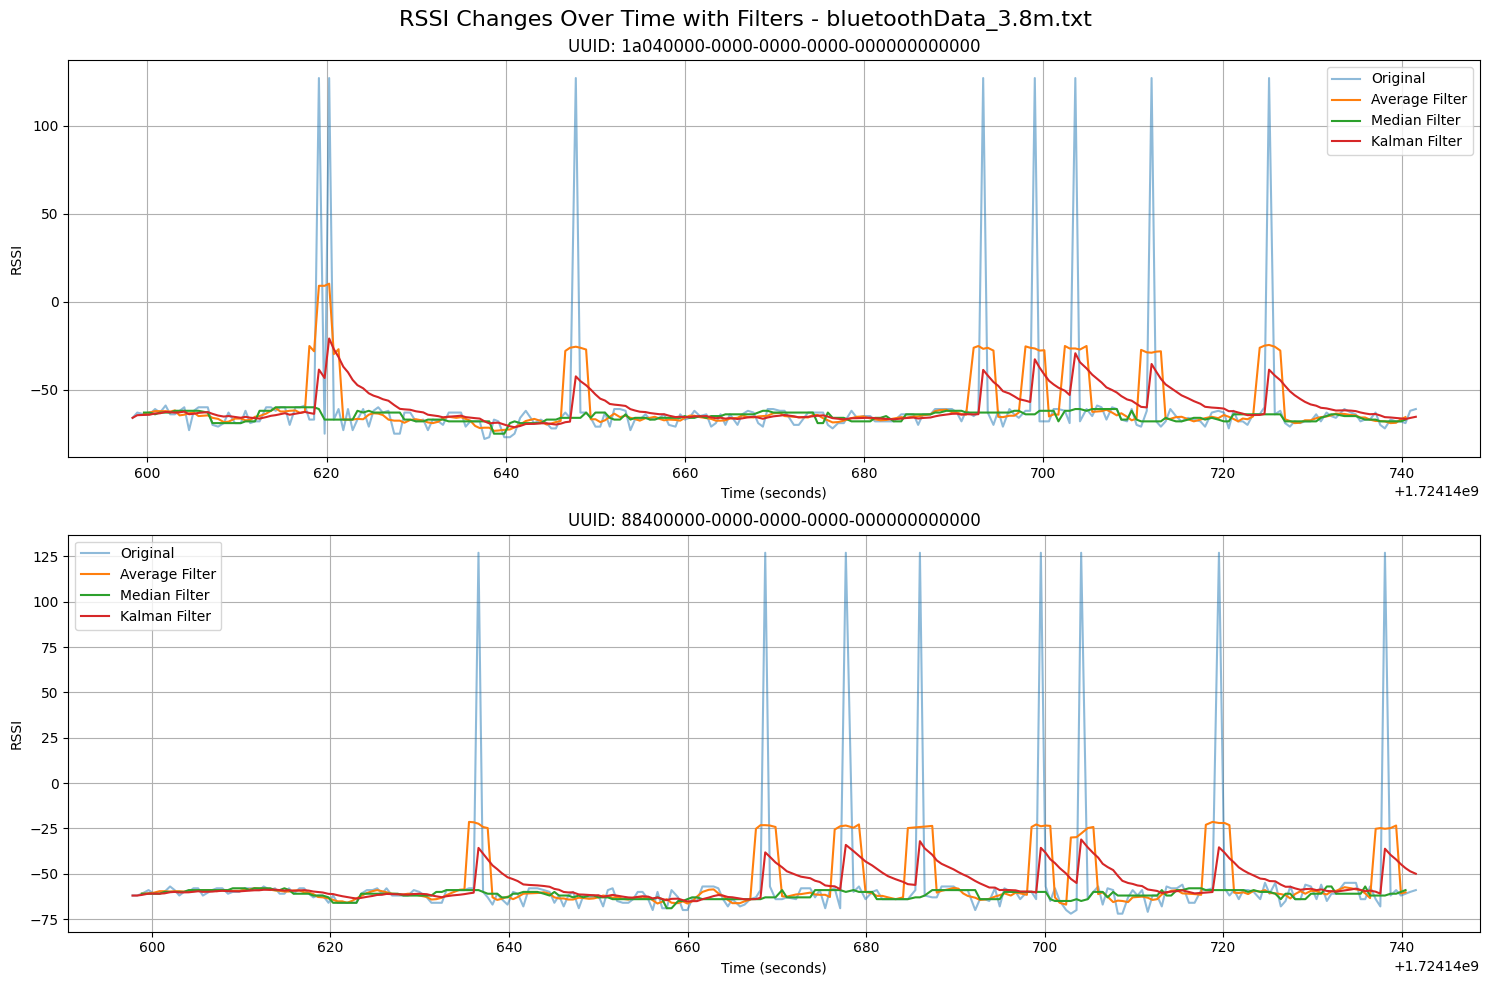

File: bluetoothData_3.8m.txt
UUID: 1a040000-0000-0000-0000-000000000000
  Original mean RSSI: -59.55
  Average filter mean RSSI: -59.47
  Median filter mean RSSI: -65.11
  Kalman filter mean RSSI: -59.51

UUID: 88400000-0000-0000-0000-000000000000
  Original mean RSSI: -55.55
  Average filter mean RSSI: -55.46
  Median filter mean RSSI: -61.36
  Kalman filter mean RSSI: -55.85



Filename to Kalman Mean RSSI Mapping:
bluetoothData_1.3m.txt: -50.69
bluetoothData_2.4m.txt: -56.91
bluetoothData_3.8m.txt: -61.36


In [5]:

# Dictionary to store filename to Kalman mean RSSI mapping
filename_to_median_mean_rssi = {}

# Apply filters and calculate mean signal strength for each UUID
for file_path in data_files:
    beacon_data = read_beacon_data(file_path)
    
    # Create a dictionary to store RSSI values for each UUID
    uuid_rssi_data = {}

    # Collect RSSI data for each UUID
    for data_list in beacon_data:
        for beacon in data_list:
            uuid = beacon['uuid']
            rssi = beacon['rssi']
            time = beacon['time'] / 1000  # Convert milliseconds to seconds
            
            if uuid not in uuid_rssi_data:
                uuid_rssi_data[uuid] = {'time': [], 'rssi': []}
            
            uuid_rssi_data[uuid]['time'].append(time)
            uuid_rssi_data[uuid]['rssi'].append(rssi)

    # Plot original and filtered RSSI changes for each UUID
    plt.figure(figsize=(15, 10))

    # Sort UUIDs to ensure consistent order
    sorted_uuids = sorted(uuid_rssi_data.keys())

    kalman_mean_rssi_list = []

    for i, uuid in enumerate(sorted_uuids):
        data = uuid_rssi_data[uuid]
        time = np.array(data['time'])
        rssi = np.array(data['rssi'])
        
        avg_filtered = apply_average_filter(rssi)
        median_filtered = apply_median_filter(rssi)
        kalman_filtered = apply_kalman_filter(rssi)
        
        plt.subplot(len(sorted_uuids), 1, i+1)
        plt.plot(time, rssi, label='Original', alpha=0.5)
        plt.plot(time[2:-2], avg_filtered, label='Average Filter')
        plt.plot(time[2:-2], median_filtered[2:-2], label='Median Filter')
        plt.plot(time, kalman_filtered, label='Kalman Filter')
        
        plt.xlabel('Time (seconds)')
        plt.ylabel('RSSI')
        plt.legend()
        plt.grid(True)
        plt.title(f'UUID: {uuid}')  # Add UUID to the subplot title

        kalman_mean_rssi_list.append(np.mean(kalman_filtered))

    plt.tight_layout()
    plt.suptitle(f'RSSI Changes Over Time with Filters - {os.path.basename(file_path)}', fontsize=16)
    plt.subplots_adjust(top=0.93)
    plt.show()

    # Store the mean Kalman filtered RSSI for this file
    filename_to_median_mean_rssi[os.path.basename(file_path)] = np.mean(median_filtered)

    # Print summary statistics
    print(f"File: {os.path.basename(file_path)}")
    for uuid in sorted_uuids:
        data = uuid_rssi_data[uuid]
        original_rssi = np.array(data['rssi'])
        avg_filtered = apply_average_filter(original_rssi)
        median_filtered = apply_median_filter(original_rssi)
        kalman_filtered = apply_kalman_filter(original_rssi)
        
        print(f"UUID: {uuid}")
        print(f"  Original mean RSSI: {np.mean(original_rssi):.2f}")
        print(f"  Average filter mean RSSI: {np.mean(avg_filtered):.2f}")
        print(f"  Median filter mean RSSI: {np.mean(median_filtered):.2f}")
        print(f"  Kalman filter mean RSSI: {np.mean(kalman_filtered):.2f}")
        print()
    print("\n" + "="*50 + "\n")

# Print the filename to Kalman mean RSSI mapping
print("Filename to Kalman Mean RSSI Mapping:")
for filename, mean_rssi in filename_to_median_mean_rssi.items():
    print(f"{filename}: {mean_rssi:.2f}")


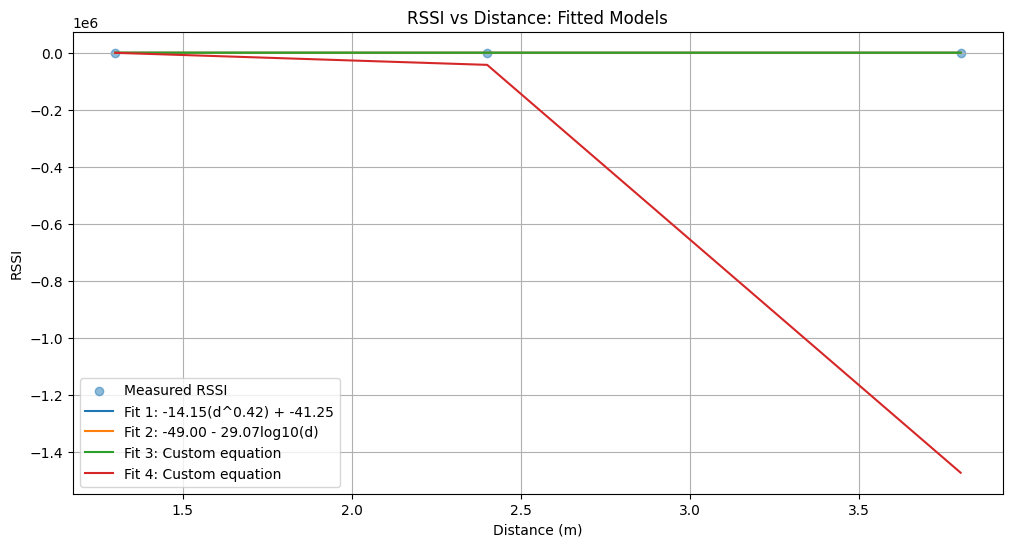

Equation 1 parameters: (-14.15, 0.42, -41.25)
Mean Absolute Error in Distance for Equation 1: 1.1787 meters
Equation 2 parameters: (-49.0, 2.907)
Mean Absolute Error in Distance for Equation 2: 0.6079 meters
Equation 3 parameters: (2.907,)
Mean Absolute Error in Distance for Equation 3: 1.3666 meters
Equation 4 parameters: (-55.47,)
Mean Absolute Error in Distance for Equation 4: 1.4979 meters

Individual Errors:
Actual Distance: 1.30m, RSSI: -50.69
  Predicted Distance (Eq1): 0.38m, Error: -0.92m
  Predicted Distance (Eq2): 1.14m, Error: -0.16m
  Predicted Distance (Eq3): 0.68m, Error: -0.62m
  Predicted Distance (Eq4): 0.99m, Error: -0.31m
Actual Distance: 2.40m, RSSI: -56.91
  Predicted Distance (Eq1): 1.27m, Error: -1.13m
  Predicted Distance (Eq2): 1.87m, Error: -0.53m
  Predicted Distance (Eq3): 1.12m, Error: -1.28m
  Predicted Distance (Eq4): 1.00m, Error: -1.40m
Actual Distance: 3.80m, RSSI: -61.36
  Predicted Distance (Eq1): 2.31m, Error: -1.49m
  Predicted Distance (Eq2): 2.6

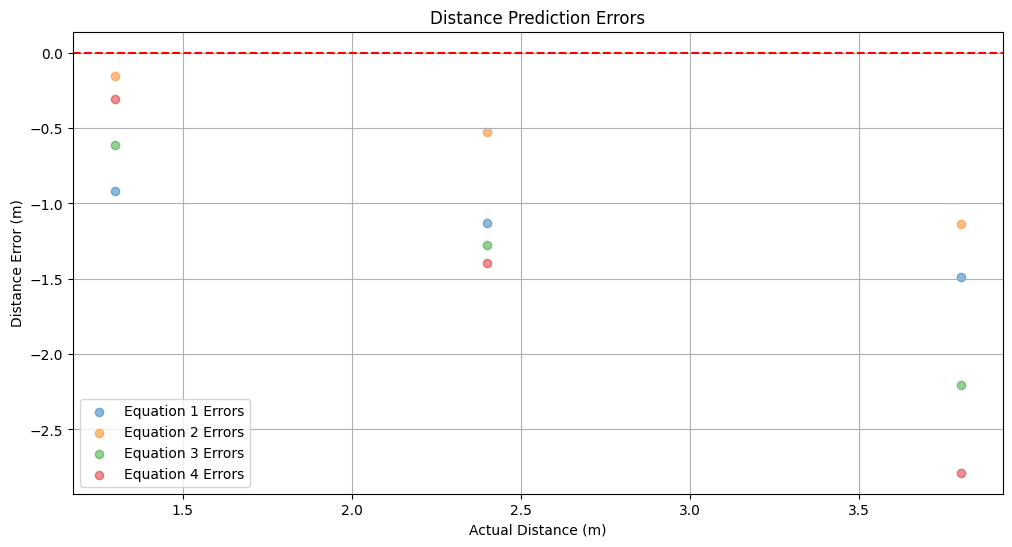

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import re
import matplotlib.pyplot as plt

# Define equations and their inverse functions
def equation1(distance, A, B, C):
    return A * (distance ** B) + C

def equation2(distance, txpower, n):
    return txpower - 10 * n * np.log10(distance)

def equation3(distance, n):
    return -55.47 - 10 * n * np.log10(distance)

def equation4(distance, measured_power):
    ratio = distance / 1.0
    return np.where(ratio < 1.0,
                    measured_power * (ratio ** 10),
                    measured_power * (0.89976 * (ratio ** 7.7095) + 0.111))

def inverse_equation1(rssi, A, B, C):
    return ((rssi - C) / A) ** (1/B)

def inverse_equation2(rssi, txpower, n):
    return 10 ** ((txpower - rssi) / (10 * n))

def inverse_equation3(rssi, n):
    return 10 ** ((-55.47 - rssi) / (10 * n))

def inverse_equation4(rssi, measured_power):
    ratio = rssi / measured_power
    return np.where(ratio < 1.0, 
                    ratio ** 0.1, 
                    ((ratio - 0.111) / 0.89976) ** (1/7.7095))

# Extract data from filename_to_median_mean_rssi
def extract_data(filename_to_median_mean_rssi):
    distances, rssi_values = [], []
    for filename, rssi in filename_to_median_mean_rssi.items():
        match = re.search(r'(\d+(?:\.\d+)?)m', filename)
        if match:
            distances.append(float(match.group(1)))
            rssi_values.append(rssi)
    return np.array(distances), np.array(rssi_values)

# Calculate errors and predictions
def calculate_errors_and_predictions(distances, rssi_values, equations, inverse_equations, params):
    predicted_distances = [inv_eq(rssi_values, *p) for inv_eq, p in zip(inverse_equations, params)]
    distance_errors = [pred_dist - distances for pred_dist in predicted_distances]
    mae = [np.mean(np.abs(error)) for error in distance_errors]
    return predicted_distances, distance_errors, mae

# Plot results
def plot_results(distances, rssi_values, equations, params, labels):
    plt.figure(figsize=(12, 6))
    plt.scatter(distances, rssi_values, label='Measured RSSI', alpha=0.5)
    for eq, p, label in zip(equations, params, labels):
        plt.plot(distances, eq(distances, *p), '-', label=label)
    plt.xlabel('Distance (m)')
    plt.ylabel('RSSI')
    plt.title('RSSI vs Distance: Fitted Models')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distance errors
def plot_distance_errors(distances, distance_errors, labels):
    plt.figure(figsize=(12, 6))
    for errors, label in zip(distance_errors, labels):
        plt.scatter(distances, errors, label=f'{label} Errors', alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Distance (m)')
    plt.ylabel('Distance Error (m)')
    plt.title('Distance Prediction Errors')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
distances, rssi_values = extract_data(filename_to_median_mean_rssi)

# Define parameters for the equations
params = [
    (-14.15, 0.42, -41.25),
    (-49.0, 2.907),
    (2.907,),
    (-55.47,)
]

equations = [equation1, equation2, equation3, equation4]
inverse_equations = [inverse_equation1, inverse_equation2, inverse_equation3, inverse_equation4]
labels = [
    f'Fit 1: {params[0][0]:.2f}(d^{params[0][1]:.2f}) + {params[0][2]:.2f}',
    f'Fit 2: {params[1][0]:.2f} - {10*params[1][1]:.2f}log10(d)',
    'Fit 3: Custom equation',
    'Fit 4: Custom equation'
]

predicted_distances, distance_errors, mae = calculate_errors_and_predictions(
    distances, rssi_values, equations, inverse_equations, params
)

plot_results(distances, rssi_values, equations, params, labels)

# Print results
for i, (eq_name, p, m) in enumerate(zip(['Equation 1', 'Equation 2', 'Equation 3', 'Equation 4'], params, mae)):
    print(f"{eq_name} parameters: {p}")
    print(f"Mean Absolute Error in Distance for {eq_name}: {m:.4f} meters")

print("\nIndividual Errors:")
for i, (distance, rssi) in enumerate(zip(distances, rssi_values)):
    print(f"Actual Distance: {distance:.2f}m, RSSI: {rssi:.2f}")
    for j, pred_dist in enumerate(predicted_distances):
        print(f"  Predicted Distance (Eq{j+1}): {pred_dist[i]:.2f}m, Error: {distance_errors[j][i]:.2f}m")

plot_distance_errors(distances, distance_errors, ['Equation 1', 'Equation 2', 'Equation 3', 'Equation 4'])

In [8]:
def get_acc_strongest_beacons(beacon_data, beacon_coords):
    strongest_uuids, signal_strengths = process_beacon_data(beacon_data)
    return [beacon_coords[uuid] for uuid in strongest_uuids]

def rssi_to_distance(rssi):
    txPower = -59
    n = 2.0
    return 10 ** ((txPower - rssi) / (10 * n))

In [9]:
import matplotlib.pyplot as plt




In [10]:
# Plot the dynamic positions

plt.figure(figsize=(10, 6))

plt.scatter(actual_coords['x'], actual_coords['y'], c='green', label='Actual Coordinates')
plt.scatter(estimated_coords['x'], estimated_coords['y'], c='red', label='Estimated Coordinates')

plt.title('Estimated vs Actual Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

KeyError: 'x'

<Figure size 1000x600 with 0 Axes>